# classification model ->dv is categorical
#loan would be approved or not->ps
#tv/dv/y-> loan_status
#steps:
# numpy,pandas,mat,seaborn,
#train test,grad,adaboost,rf,cla,svm,dt,log
#load the dataset
#shape
#missing values
#outliers
#data visualization->10
#describe
#data types

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
#metrics
from sklearn import metrics
from sklearn import linear_model
# classification algorithms
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
loan_df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan_df.shape

(614, 13)

In [24]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Handling with Missing_Values

In [7]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [18]:
model1=loan_df['Gender'].mode().iloc[0]
model2=loan_df['Married'].mode().iloc[0]
model3=loan_df['Dependents'].mode().iloc[0]
model4=loan_df['Self_Employed'].mode().iloc[0]
model5=loan_df['LoanAmount'].median()
model6=loan_df['Loan_Amount_Term'].median()
model7=loan_df['Credit_History'].median()

In [22]:
loan_df['Gender'].fillna(model1,inplace=True)
loan_df['Married'].fillna(model2,inplace=True)
loan_df['Dependents'].fillna(model3,inplace=True)
loan_df['Self_Employed'].fillna(model4,inplace=True)
loan_df['LoanAmount'].fillna(model5,inplace=True)axis=1
loan_df['Loan_Amount_Term'].fillna(model6,inplace=True)
loan_df['Credit_History'].fillna(model7,inplace=True)

In [23]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Removing_unneccesary_columns

In [27]:
loan_df.drop(['Loan_ID'],axis=1,inplace=True)

In [29]:
loan_df['Dependents'].replace(['3+'],4,inplace=True)
loan_df['Dependents'].replace(['3'],3,inplace=True)
loan_df['Dependents'].replace(['2'],2,inplace=True)
loan_df['Dependents'].replace(['1'],1,inplace=True)
loan_df['Dependents']=loan_df['Dependents'].astype(float)

In [30]:
loan_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Onehot_encoding

In [32]:
l1_df=pd.get_dummies(loan_df,columns=['Gender','Married','Education','Self_Employed','Property_Area'])
l1_df


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,4.0,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [33]:
l1_df.dtypes

Dependents                 float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

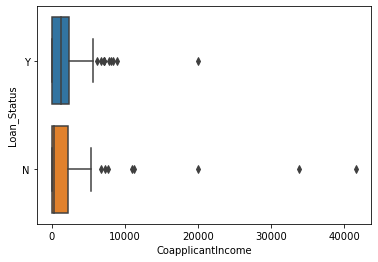

In [34]:
sns.boxplot(x="CoapplicantIncome",y="Loan_Status",data=l1_df)


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

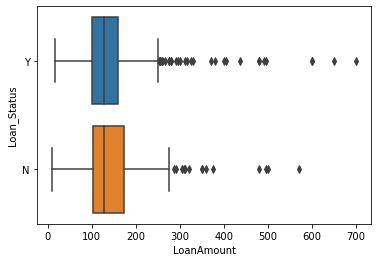

In [35]:
sns.boxplot(x='LoanAmount',y='Loan_Status',data=l1_df)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

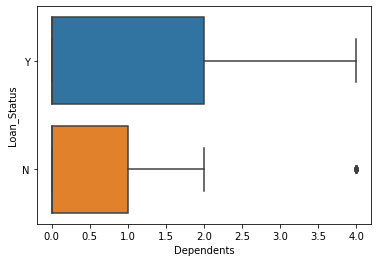

In [36]:
sns.boxplot(x='Dependents',y='Loan_Status',data=l1_df)

In [38]:
#l1_df['zscore1']=(l1_df['LoanAmount']-l1_df['LoanAmount'].mean())/l1_df['LoanAmount'].std()
#l1_df.drop(l1_df[np.abs(l_df['zscore1'])>3].index, inplace = True)
#l1_df['zscore2']=(l1_df['CoapplicantIncome']-l1_df['CoapplicantIncome'].mean())/l1_df['CoapplicantIncome'].std()
#l1_df.drop(l_df[np.abs(l1_df['zscore2'])>3].index, inplace = True)


<AxesSubplot:xlabel='Married_Yes', ylabel='count'>

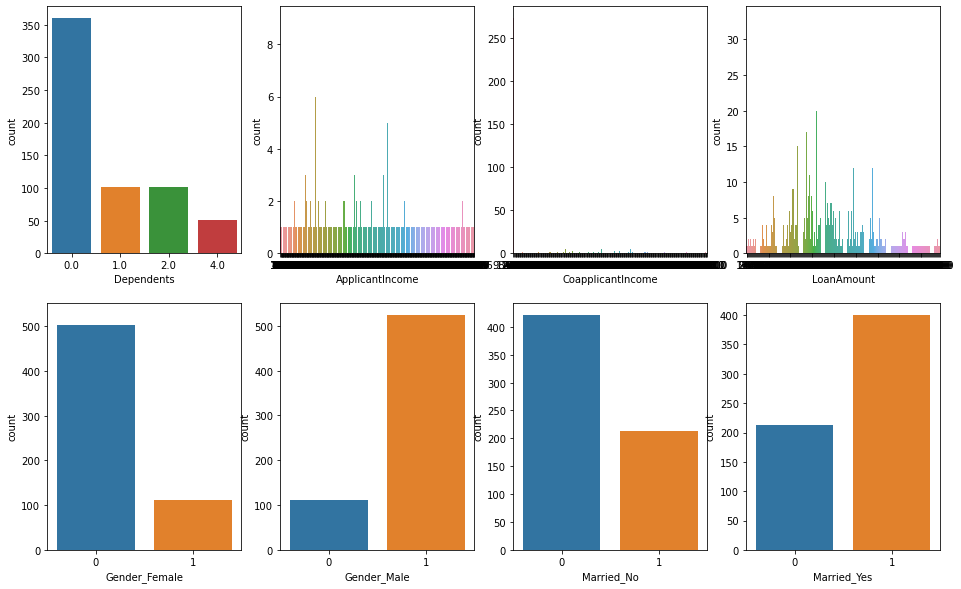

In [42]:
fig,ax=plot.subplots(2,4,figsize=(16,10))
sns.countplot('Dependents',data=l1_df,ax=ax[0][0])
sns.countplot('ApplicantIncome',data=l1_df,ax=ax[0][1])
sns.countplot('CoapplicantIncome',data=l1_df,ax=ax[0][2])
sns.countplot('LoanAmount',data=l1_df,ax=ax[0][3])
sns.countplot('Loan_Amount_Term',data=l1_df,ax=ax[1][0])
sns.countplot('Credit_History',data=l1_df,ax=ax[1][1])
sns.countplot('Loan_Status',data=l1_df,ax=ax[1][2])
sns.countplot('Gender_Female',data=l1_df,ax=ax[1][0])
sns.countplot('Gender_Male',data=l1_df,ax=ax[1][1])
sns.countplot('Married_No',data=l1_df,ax=ax[1][2])
sns.countplot('Married_Yes',data=l1_df,ax=ax[1][3])


array([[<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>],
       [<AxesSubplot:title={'center':'Married_No'}>,
        <AxesSubplot:title={'center':'Married_Yes'}>,
        <AxesSubplot:title={'center':'Education_Graduate'}>,
        <AxesSubplot:title={'center':'Education_Not Graduate'}>],
       [<AxesSubplot:title={'center':'Self_Employed_No'}>,
        <AxesSubplot:title={'center':'Self_Employed_Yes'}>,
        <AxesSubplot:title={'center':'Property_Area_Rural'}>,
        <AxesSubplot:title={'center':'Property_Area_Semiurban'}>],
       [<AxesSubplot:title={'center':'Property_Area_Urban'}>,
    

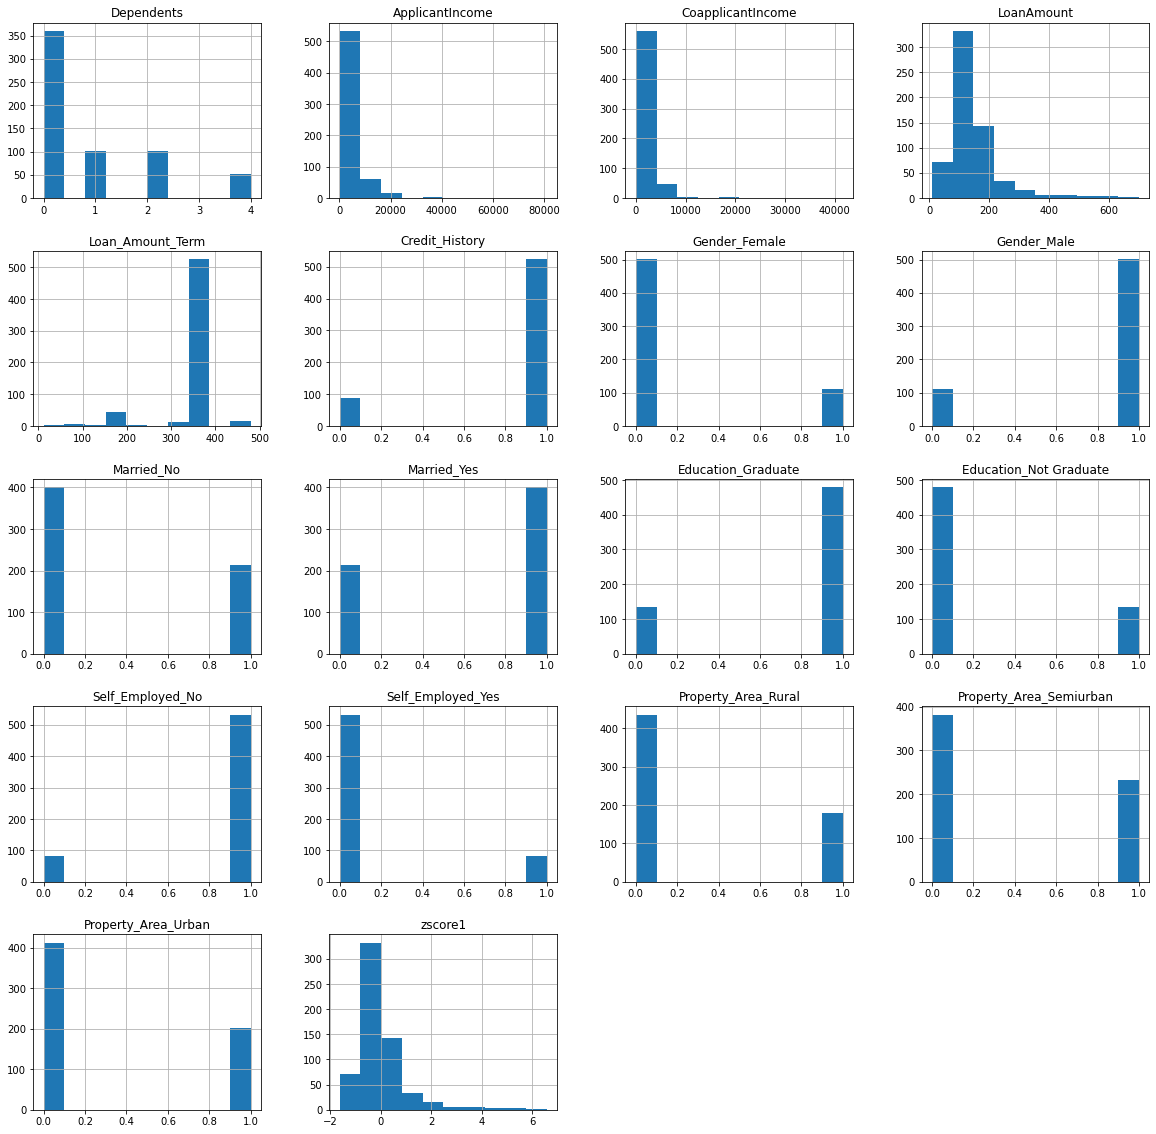

In [43]:
l1_df.hist(figsize=(20,20))

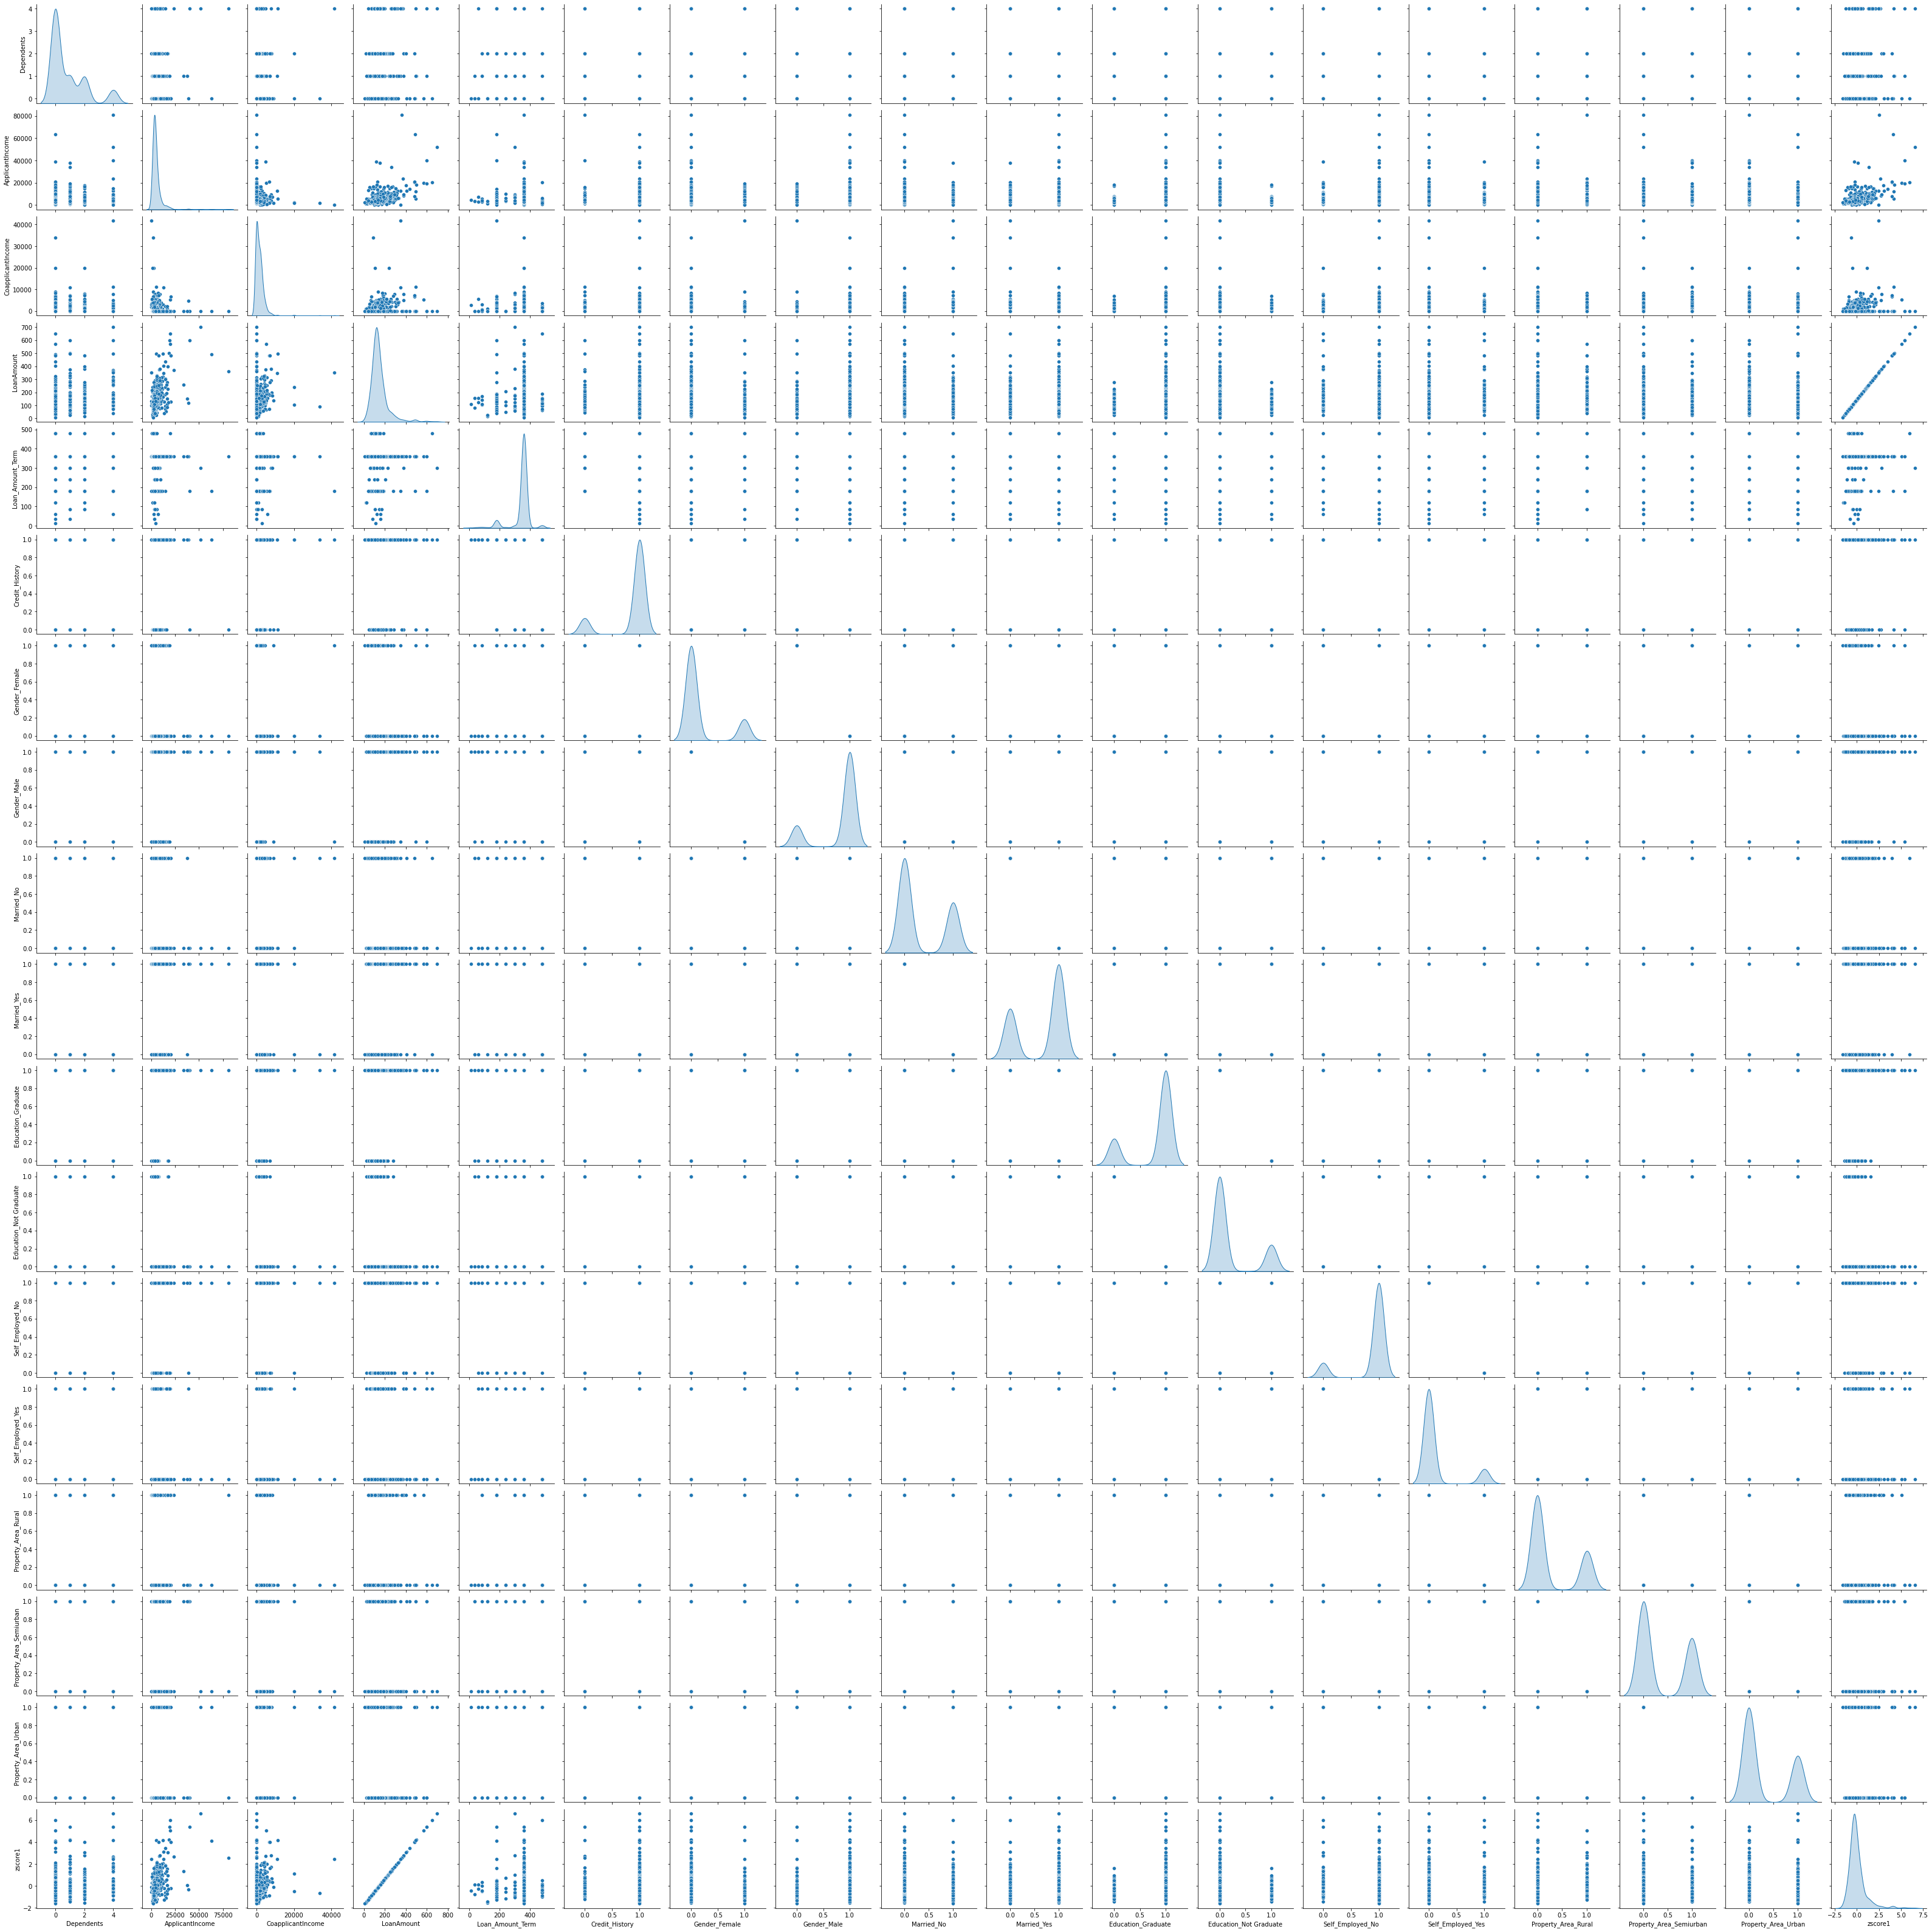

In [44]:
sns.pairplot(l1_df,diag_kind="kde")

<AxesSubplot:>

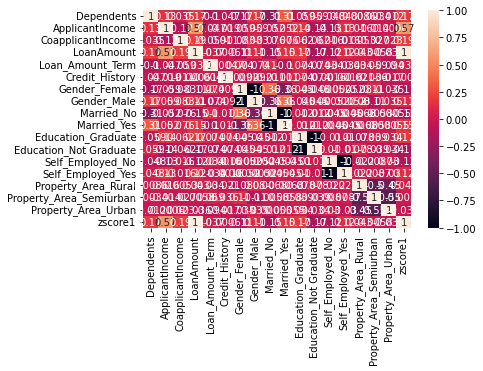

In [45]:
corr=l1_df.corr()
sns.heatmap(corr,annot=True)

In [54]:
X=l_df.drop(['Loan_Status'],axis=1)
y=l_df[['Loan_Status']]


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


In [56]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
print(logistic_regression.score(X_train,y_train),logistic_regression.score(X_test,y_test))

0.8088578088578089 0.7675675675675676


metrics

In [61]:
predictions=logistic_regression.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.80      0.39      0.53        61
           Y       0.76      0.95      0.85       124

    accuracy                           0.77       185
   macro avg       0.78      0.67      0.69       185
weighted avg       0.77      0.77      0.74       185



Knn classifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=80,p=2) #p=1, manhattan p=2, euclidian
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))


0.6946386946386947 0.6702702702702703


In [66]:
predictions=knn.predict(X_test)
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           N       0.00      0.00      0.00        61
           Y       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



Svc  Model

In [64]:
Sc=SVC(kernel='linear',C=2,gamma='auto')
Sc.fit(x_train,y_train)
print(Sc.score(x_train,y_train),Sc.score(x_test,y_test))


0.7972027972027972 0.7783783783783784


In [68]:
predictions=Sc.predict(X_test)
print(metrics.classification_report(y_test,predictions))



              precision    recall  f1-score   support

           N       0.88      0.38      0.53        61
           Y       0.76      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.82      0.68      0.69       185
weighted avg       0.80      0.78      0.75       185



Ensembling-models

Adaboost Classifier

In [69]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print(adb.score(x_train,y_train),adb.score(X_test,y_test))


0.8648018648018648 0.7621621621621621


In [70]:
predictions=adb.predict(x_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.73      0.44      0.55        61
           Y       0.77      0.92      0.84       124

    accuracy                           0.76       185
   macro avg       0.75      0.68      0.69       185
weighted avg       0.76      0.76      0.74       185



In [71]:
gbc=GradientBoostingClassifier(n_estimators=30)
gbc.fit(X_train,y_train)
print(gbc.score(X_train,y_train),gbc.score(x_test,y_test))


0.8461538461538461 0.7891891891891892


In [72]:
predictions=gbc.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.89      0.41      0.56        61
           Y       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185



Decisiontree Classifier

In [73]:
dtm=DecisionTreeClassifier(max_depth=0.5,criterion='entropy')
dtm.fit(X_train,y_train)
print(dtm.score(X_train,y_train),dtm.score(X_test,y_test))

0.6946386946386947 0.6702702702702703


In [74]:
predictions=dtm.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        61
           Y       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



Randomforest Classifier

In [76]:
rfc=RandomForestClassifier(n_estimators=40,max_features=9)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train),rfc.score(X_test,y_test))


1.0 0.7783783783783784


In [77]:
predictions=rfc.predict(X_test)
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           N       0.75      0.49      0.59        61
           Y       0.79      0.92      0.85       124

    accuracy                           0.78       185
   macro avg       0.77      0.71      0.72       185
weighted avg       0.77      0.78      0.76       185



Bagging Classifier

In [78]:
bgc1=BaggingClassifier(n_estimators=12,base_estimator=dtm)
bgc1.fit(X_train,y_train)
print(bgc1.score(X_train,y_train),bgc1.score(X_test,y_test))

0.6946386946386947 0.6702702702702703


In [79]:
predictions=bgc1.predict(X_test)
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           N       0.00      0.00      0.00        61
           Y       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

